# Multiple Linear Regression

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
data=pd.read_csv('C:/Users/david/Downloads/Datasets/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
data.shape

(50, 5)

In [12]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,4].values

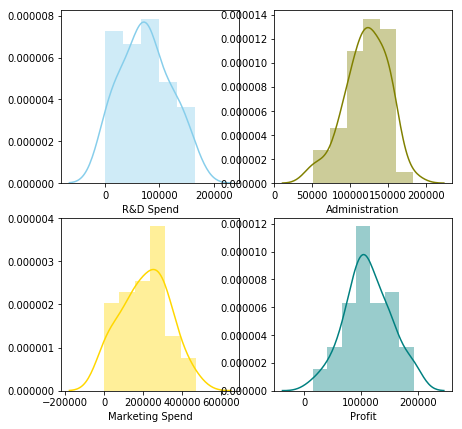

In [13]:
f,axes=plt.subplots(2,2,figsize=(7,7))
sb.distplot(data['R&D Spend'],color='skyblue',ax=axes[0,0])
sb.distplot(data['Administration'],color='olive',ax=axes[0,1])
sb.distplot(data['Marketing Spend'],color='gold',ax=axes[1,0])
sb.distplot(data['Profit'],color='teal',ax=axes[1,1])

In [14]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,4].values

In [18]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,3]=labelencoder_X.fit_transform(X[:,3])
onehotencoder=OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()

C:\Users\david\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\david\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [9]:
#Avoiding the Dummy variable trap
X=X[:,1:]

In [10]:
#spliting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
regessor=LinearRegression()
regessor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
regessor.score(x_test,y_test)

0.9347068473283267

In [13]:
y_pred=regessor.predict(x_test)
y_pred

array([103015.20159795, 132582.27760817, 132447.73845176,  71976.09851257,
       178537.48221058, 116161.24230165,  67851.69209675,  98791.73374686,
       113969.43533013, 167921.06569553])

# Backward Elimination

In [28]:
#OLS(orinary least square)
import statsmodels.formula.api as sm

In [24]:
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)

In [25]:
X_opt=X[:,[0,1,2,3,4,5]]

In [27]:
regessor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regessor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           1.34e-27
Time:                        15:04:08   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_opt=X[:,[0,1,3,4,5]]
regessor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regessor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           8.49e-29
Time:                        15:08:16   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X_opt=X[:,[0,3,4,5]]
regessor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regessor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           4.53e-30
Time:                        15:09:52   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X_opt=X[:,[0,1,3,5]]
regessor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regessor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     294.1
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           5.19e-30
Time:                        15:11:57   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.695e+04   2761.499     17.002      0.000    4.14e+04    5.25e+04
x1           150.7580   2874.516      0.052      0.958   -5635.342    5936.858
x2             0.7967      0.042     19.024      0.000       0.712       0.881
x3             0.0298      0.016      1.863      0.069      -0.002       0.062
==============================================================================
Omnibus:                       14.628   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.992
Skew:                          -0.938   Prob(JB):                     2.76e-05
Kurtosis:                       5.560   Cond. No.                     5.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X_opt=X[:,[3,5]]
regessor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regessor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     550.4
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           8.02e-34
Time:                        16:39:45   Log-Likelihood:                -575.87
No. Observations:                  50   AIC:                             1156.
Df Residuals:                      48   BIC:                             1160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9781      0.108      9.026      0.000       0.760       1.196
x2             0.1375      0.039      3.563      0.001       0.060       0.215
==============================================================================
Omnibus:                        0.664   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.715
Skew:                          -0.043   Prob(JB):                        0.700
Kurtosis:                       2.420   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X_opt=X[:,[3,5]]
X_opt

array([[165349.2 , 471784.1 ],
       [162597.7 , 443898.53],
       [153441.51, 407934.54],
       [144372.41, 383199.62],
       [142107.34, 366168.42],
       [131876.9 , 362861.36],
       [134615.46, 127716.82],
       [130298.13, 323876.68],
       [120542.52, 311613.29],
       [123334.88, 304981.62],
       [101913.08, 229160.95],
       [100671.96, 249744.55],
       [ 93863.75, 249839.44],
       [ 91992.39, 252664.93],
       [119943.24, 256512.92],
       [114523.61, 261776.23],
       [ 78013.11, 264346.06],
       [ 94657.16, 282574.31],
       [ 91749.16, 294919.57],
       [ 86419.7 ,      0.  ],
       [ 76253.86, 298664.47],
       [ 78389.47, 299737.29],
       [ 73994.56, 303319.26],
       [ 67532.53, 304768.73],
       [ 77044.01, 140574.81],
       [ 64664.71, 137962.62],
       [ 75328.87, 134050.07],
       [ 72107.6 , 353183.81],
       [ 66051.52, 118148.2 ],
       [ 65605.48, 107138.38],
       [ 61994.48,  91131.24],
       [ 61136.38,  88218.23],
       [

In [35]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
